## Objective of Data Collection:
Collecting this data aims to help predict the likelihood of heart disease in patients by analyzing key health factors like age, cholesterol levels, blood pressure, and symptoms experienced during exercise. By gathering this information, the aim is to identify individuals at risk early on, so that preventive measures and treatments can be provided promptly. This data can be used for classification to build models that assist healthcare providers in making better decisions, as well as for clustering to discover patterns and subgroups within the patient population. Ultimately, this improves patient outcomes and reduces the number of heart-related deaths.

The source of dataset:
https://www.kaggle.com/code/parsalatifi/heart-failure-prediction-95-accuracy-score

In [91]:
import pandas as pd
df = pd.read_csv('heart.csv')
print ("Datset Information:")
print(df.info())

Datset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


# General Information

In [92]:
data = pd.read_csv('heart.csv')
num_attributes = data.shape[1]
num_object = data.shape[0]
attribute_types = data.dtypes.to_frame( name = 'Data Types')
class_name = data.columns[-1]
class_label = data.columns[-1]

print(f"\033[1mGeneral iformation:\n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_object}\n")
print(f"\033[1mClass lable:\033[0m {class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)

General iformation:

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64


# Sample of the data

In [93]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Show the Min, 1st Qu, Median, Mean, 3rd Qu, Max, Standard Deviation for Each Numeric Column:

In [94]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Age: Patients’ ages range from 28 to 77, with a median of 54 and a mean of 53.5, indicating a middle-aged population. Most patients are in the middle-aged to elderly range, as 50% of the patients are aged 54 or older, while 25% are younger than 47.

RestingBP: The values have a mean of 132.4 and a median of 130. The interquartile range is 120 to 140, showing that most patients have normal blood pressure levels. However, a minimum value of 0 suggests data errors, which will be handled later.

Cholesterol: The majority of patients (IQR: 173 to 267) fall within normal (<200) to borderline high (>240) cholesterol levels. However, a minimum value of 0 suggests data errors, which will be handled later.

FastingBS: Most patients (76.7%) have normal fasting blood sugar levels (0), while a small portion (23.3%) have elevated levels (1).

MaxHR: Maximum heart rates vary between 60 and 202, with a median of 138, indicating diverse cardiovascular performance.

Oldpeak: The IQR (0 to 1.5) means most patients experience mild to moderate ST depression during exercise, which is a common indicator of ischemia (reduced blood flow due to a blockage or narrowing of blood vessels) or heart disease.

HeartDisease: The target variable indicates that 55.3% of patients have heart disease, while 44.7% do not, showing a relatively balanced distribution with a slight majority having heart disease.

# Varaince

In [95]:
data = pd.read_csv('heart.csv')
variance= data.var(numeric_only=True);
print(variance);

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64


Key insights from the variance analysis:
Age: With a moderate variance of 88.97, the ages of the patients show a reasonable amount of variability, which is consistent with the broad age range (28–77 years). RestingBP: The variance of 342.77 reflects significant variability in blood pressure readings across patients, indicating different health conditions. The outlier with a value of 0 may be contributing to the high variance. Cholesterol: A very high variance of 11964.89 suggests large disparities in cholesterol levels, primarily driven by outliers (0 values) and a wide range of values (0–603). FastingBS: The low variance of 0.18 points to an imbalanced distribution, with most patients having normal fasting blood sugar levels (0). MaxHR: A high variance of 648.23 demonstrates considerable variation in maximum heart rates among the patients. Oldpeak: The low variance of 1.14 indicates that there is minimal variation in ST depression during exercise, with most of the values clustered near one another. HeartDisease: The variance of 0.25 suggests a fairly even distribution between the presence and absence of heart disease, indicating a relatively balanced dataset for this binary variable.

# Data Representation:
Visualizing the Relationship Between Heart Disease and Key Attributes

Graphical representations are essential for exploring the connections between heart disease and various factors. The "HeartDisease" label, which categorizes individuals as either having or not having heart disease, serves as the main target variable. By examining how this label correlates with other attributes in the dataset, we can uncover valuable insights about the relationship between these factors and the likelihood of developing heart disease. Visual analysis can also highlight trends, such as the potential influence of gender and age—whether men are more susceptible to heart disease than women, and how age might be positively or negatively associated with its onset. Such visualizations play a key role in identifying significant risk factors and potential early warning signs, aiding in the early detection and diagnosis of heart disease.

# bar charts

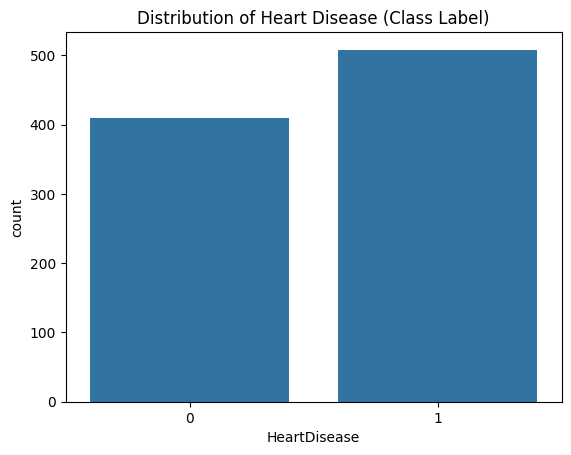

Class Distribution (%):
 HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

✅ The dataset is balanced.


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease (Class Label)')
plt.show()

class_distribution = df['HeartDisease'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

max_diff = class_distribution.max() - class_distribution.min()
if max_diff < 15:
    print("\n✅ The dataset is balanced.")
else:
    print("\n⚠️ The dataset is imbalanced.")

The distribution of the HeartDisease variable was analyzed using a bar  and statistical summary, revealing that:  

- 55.34% of the samples belong to class 1 (Heart Disease present).  
- 44.66% of the samples belong to class 0 (No Heart Disease).  
- The distribution is relatively even between the two classes, indicating that the dataset is **balanced

# Pie chart

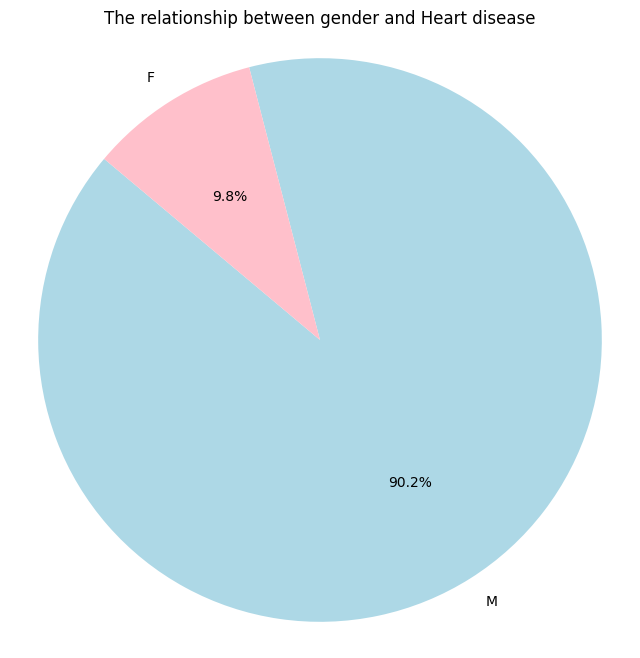

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

genderDiagnosisCounts = data[data['HeartDisease'] == 1]['Sex'].value_counts();
plt.figure(figsize=(8, 8));
plt.pie(genderDiagnosisCounts, labels=genderDiagnosisCounts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','pink']);
plt.title('The relationship between gender and Heart disease');
plt.axis('equal');
plt.show();

Text(0.5, 1.0, 'FastingBS')

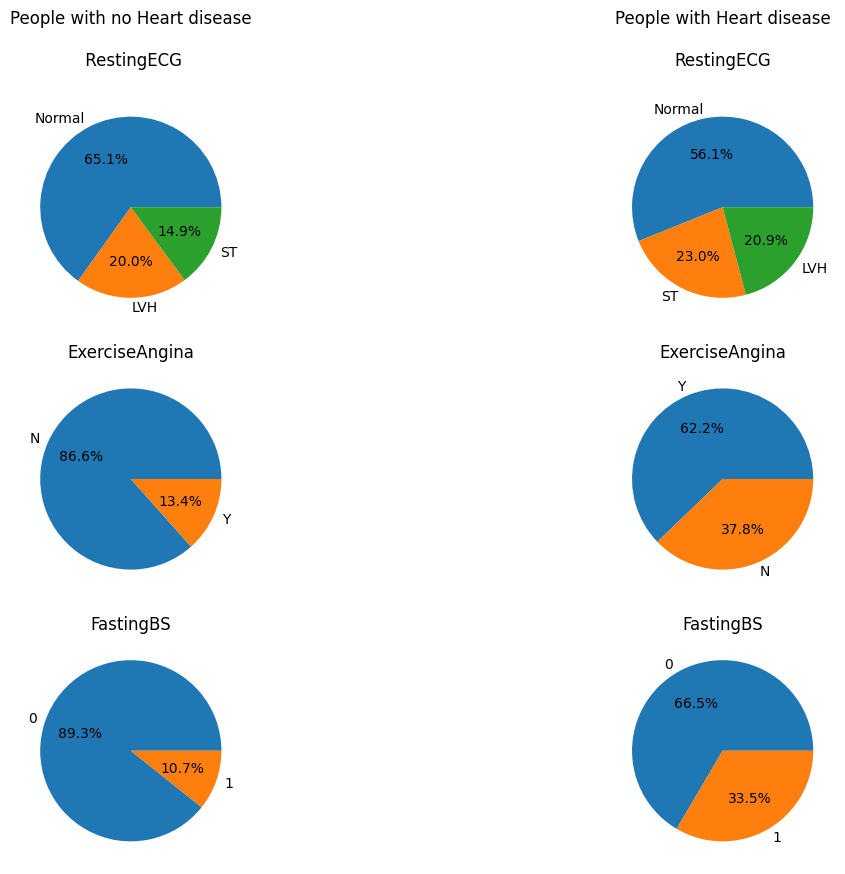

In [98]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( data[data.HeartDisease == 0]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( data[data.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( data[data.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( data[data.HeartDisease == 0]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( data[data.HeartDisease == 1]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")

Fasting Blood Sugar: Elevated levels of fasting blood sugar are more frequently observed in individuals with heart disease (33.5%) compared to those without (10.7%).

Resting ECG: Normal ECG readings are less common among those with heart disease (56.1%) than in those without (65.1%). Individuals with heart disease are more likely to display abnormalities, such as ST segment changes or left ventricular hypertrophy.

Exercise Angina: Individuals with heart disease are significantly more prone to experiencing exercise-induced angina (62.2%) compared to those without heart disease (13.4%).

These graphs illustrate crucial trends in heart disease, showing the strong relationships with other health factors, including fasting blood sugar, resting ECG, and exercise-induced angina.

# scatter plot

In [99]:
data = pd.read_csv('heart.csv')

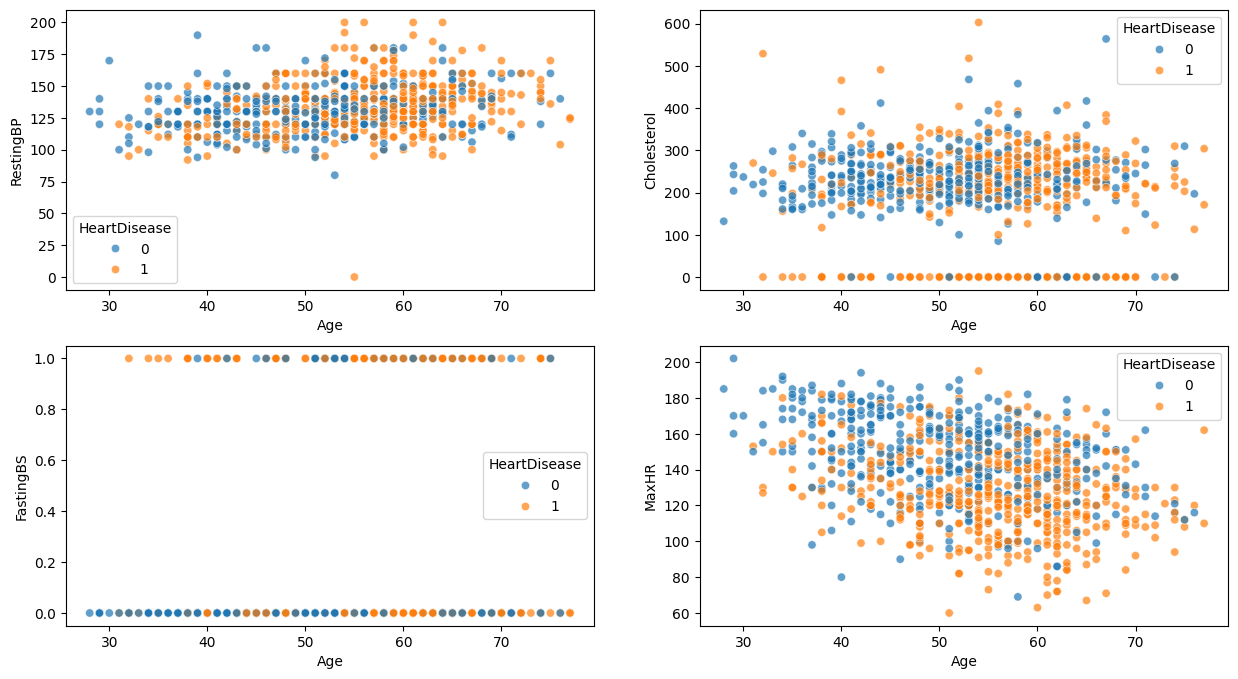

In [100]:

fig,axes=plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=data,x='Age',y='RestingBP',ax=axes[0][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='Cholesterol',ax=axes[0][1],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='FastingBS',ax=axes[1][0],hue='HeartDisease',alpha=0.7)
sns.scatterplot(data=data,x='Age',y='MaxHR',ax=axes[1][1],hue='HeartDisease',alpha=0.7)
plt.show()

MaxHR and FastingBS emerge as significant indicators for predicting heart disease across all age groups. Individuals diagnosed with heart disease tend to have consistently lower MaxHR values, while elevated fasting blood sugar (FastingBS = 1) is more common in this group.

Cholesterol and RestingBP become more significant in older age groups for identifying heart disease:

Cholesterol: Elevated cholesterol levels are more common in individuals aged 50 and above with heart disease, though this trend is less prominent in younger age groups. RestingBP: Higher RestingBP values are observed more frequently in people with heart disease, particularly among those aged 50 to 70, highlighting its increasing importance with age. Fasting Blood Sugar (FastingBS) continues to show a strong and consistent association with heart disease across all age ranges, irrespective of other factors.

# boxplot

<ipython-input-101-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
<ipython-input-101-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
<ipython-input-101-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
<ipython-input-101-33e498f95002>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

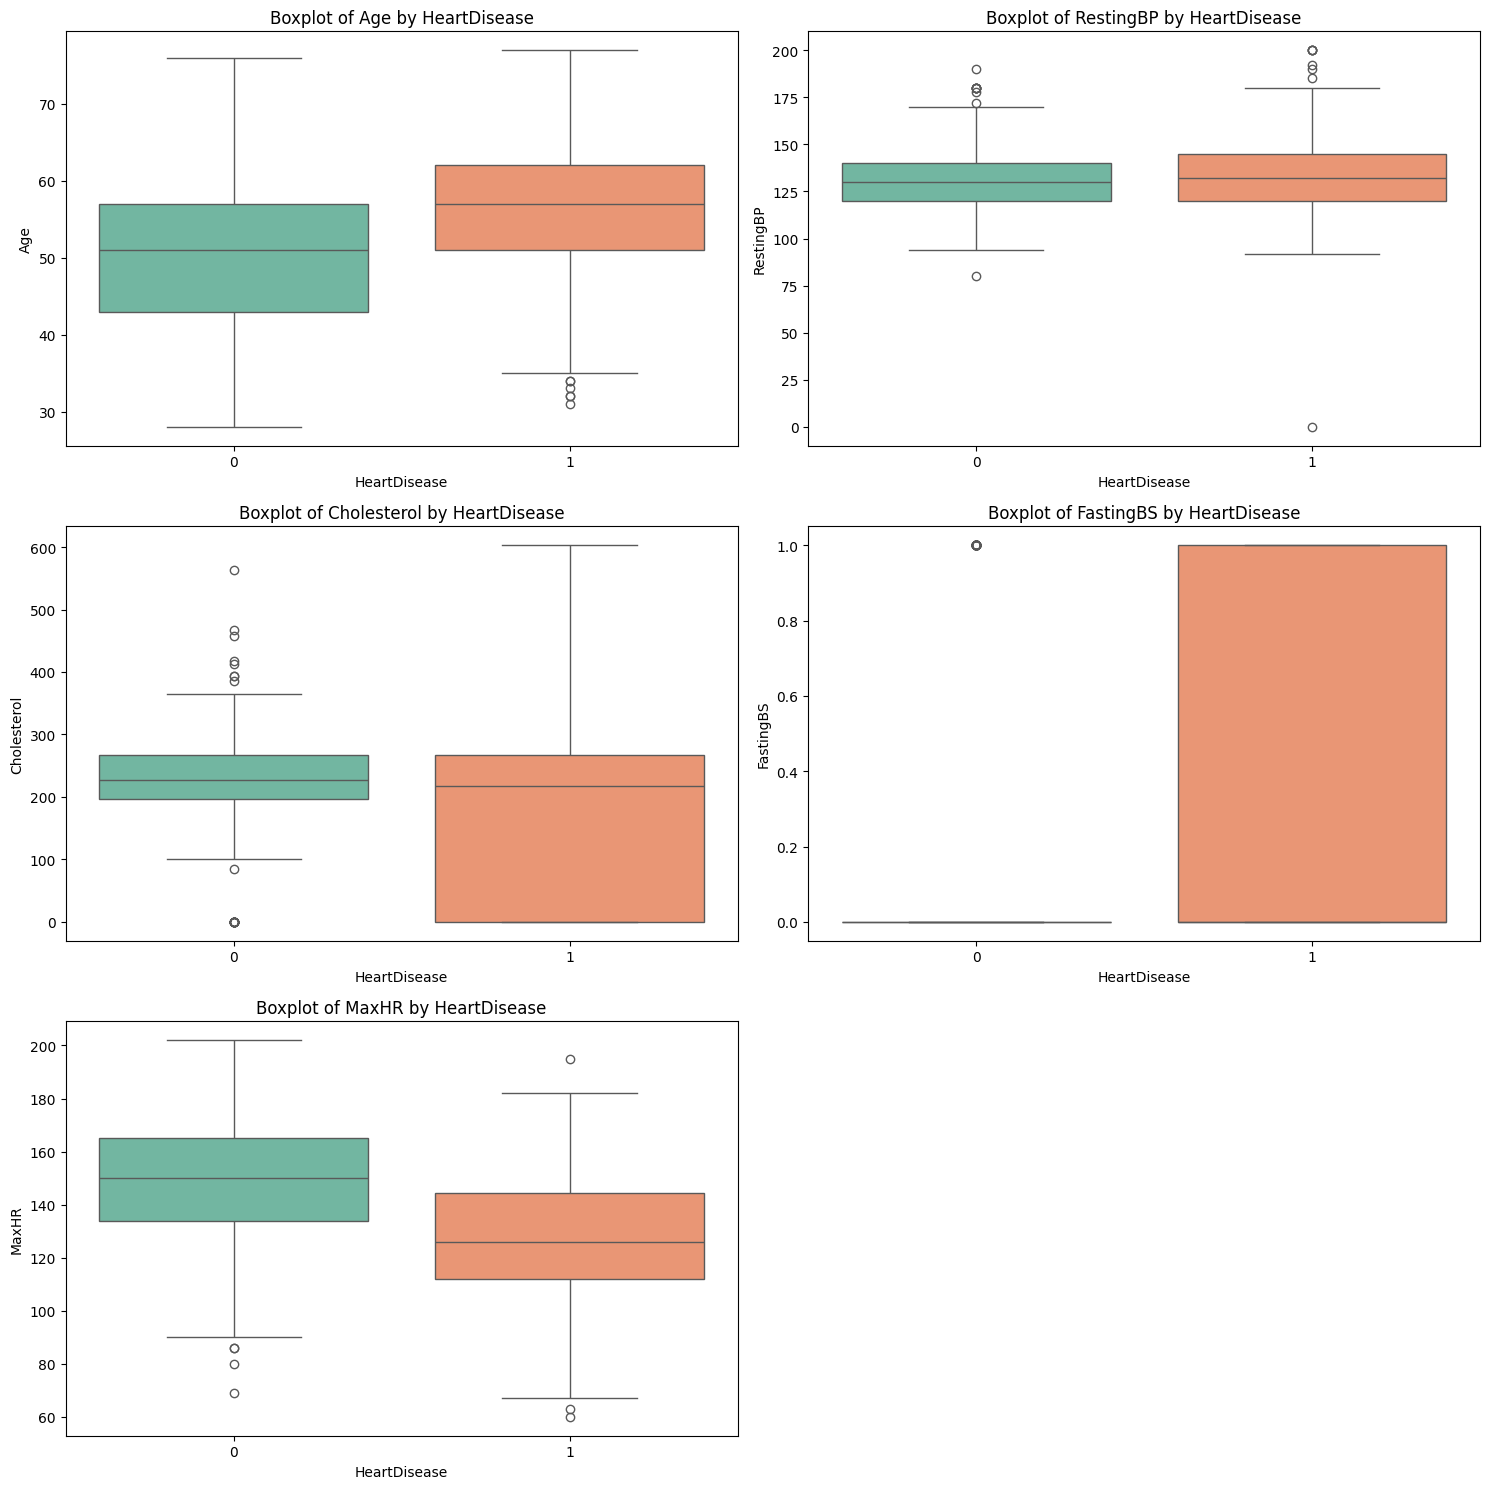

In [101]:
plt.figure(figsize=(15,15))

for i, col in enumerate(data.columns[data.dtypes=='int64'].drop('HeartDisease'), 1):
    plt.subplot(3, 2, i)
    plt.title(f"Boxplot of {col} by HeartDisease")
    sns.boxplot(x=data['HeartDisease'], y=col, data=data, palette="Set2")
    plt.tight_layout()

plt.show()

Individuals with heart disease (orange) tend to be older, with a median age of around 58, while those without heart disease (green) have a lower median age, approximately 52. 2. RestingBP shows a wider range and more outliers in individuals with heart disease, suggesting that high blood pressure may play a role in heart disease risk. 3. Cholesterol levels are significantly higher in those with heart disease, indicating that high cholesterol is a potential risk factor. 4. Fasting Blood Sugar is a strong indicator of heart disease, as nearly all individuals without heart disease have low fasting blood sugar, while those with heart disease typically exhibit higher levels. 5. For individuals without heart disease, the median MaxHR is higher, around 155 bpm, with most values concentrated between 130 and 165 bpm. In contrast, individuals with heart disease have a lower median MaxHR, around 140 bpm, with a wider range of values, displaying greater variability and more outliers. This suggests that people with heart disease tend to have lower MaxHR compared to those without heart disease.

# bar charts

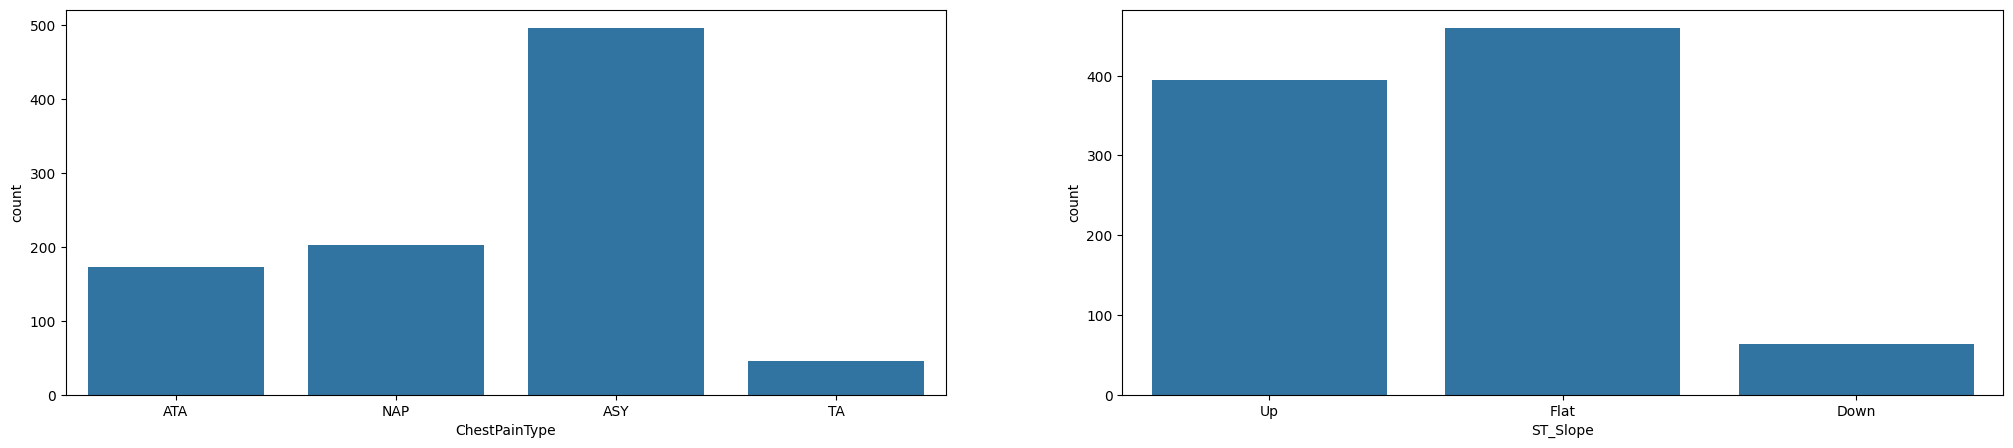

In [102]:
cat = ['ChestPainType',  'ST_Slope']
plt.figure(figsize=(25, 5))
for i in range(len(cat)):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=cat[i], data=data)

This graph displays two count plots, representing the distribution of ChestPainType and ST_Slope from the heart disease dataset. The ChestPainType plot shows that most people have the ASY (asymptomatic) type, which means they do not experience noticeable symptoms of chest pain. For the ST_Slope plot, the majority of people have a Flat ST segment, which could indicate a risk of heart issues. These findings suggest that asymptomatic chest pain and a flat ST slope are common among the individuals in the dataset, both of which could be associated with heart disease.

# Data Preprocessing

# Missing Values

The dataset contains 173 missing value.

 After examining the data, we noticed that some missing values were replaced with 0, which is unnatural for this type of data. To address this, we replaced the 0 values with 'None' so that we can accurately detect and handle the missing values. The code identifies and counts the missing values, and then it prints the rows containing missing data for further analysis.


In [103]:
data = pd.read_csv('heart.csv')

## replace 0 (null value in certain culmns) with None
columns_to_check = ['Cholesterol', 'RestingBP', 'MaxHR', 'Age']
for column in columns_to_check:
    data[column] = data[column].replace(0, None)

missing_values_count = data.isnull().sum()
missing_rows = data[data.isnull().any(axis=1)]

print("Missing: ", missing_values_count)
print("\nRows with missing values:")
print(missing_rows)

Missing:  Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

Rows with missing values:
     Age Sex ChestPainType RestingBP Cholesterol  FastingBS RestingECG  MaxHR  \
293   65   M           ASY       115        None          0     Normal     93   
294   32   M            TA        95        None          1     Normal    127   
295   61   M           ASY       105        None          1     Normal    110   
296   50   M           ASY       145        None          1     Normal    139   
297   57   M           ASY       110        None          1         ST    131   
..   ...  ..           ...       ...         ...        ...        ...    ...   
514   43   M           ASY       122        None          0     Normal    120   
515   63   M           NAP       130  

# Replace missing data with the average

 After identifying the missing values, we calculated the mean for the relevant columns and used these values to fill in the missing data. We then checked the number of remaining missing values in each column to ensure that the process was successful.

In [104]:
data = pd.read_csv('heart.csv')

# Calculate the mean values for Cholesterol and RestingBP
mean_values = data[['Cholesterol', 'RestingBP']].mean()

# Replace missing values with the calculated mean
data[['Cholesterol', 'RestingBP']] = data[['Cholesterol', 'RestingBP']].fillna(mean_values)

# Print the number of missing values in each column after the replacement
print('Missing: ', data.isna().sum())

Missing:  Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Duplicate Values

The dataset doesn't contain any duplicate rows.
We checked for duplicate rows in the dataset and found the total count of duplicates. After removing the duplicate rows, we saved the cleaned dataset into a new file called 'Cleaned_dataset.csv'.


In [105]:
data = pd.read_csv('heart.csv')

duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

data_cleaned = data.drop_duplicates()
data_cleaned.to_csv('Cleaned_dataset.csv', index=False)

Number of duplicate rows: 0


# Handling outliers

Before we began dealing with outliers, we chose the IQR approach to identify the number of outliers within our dataset.

In [106]:
data = pd.read_csv('heart.csv')
##Identifying the outliers
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 28 rows with outliers
Cholesterol: 183 rows with outliers
MaxHR: 2 rows with outliers
Oldpeak: 16 rows with outliers
Total Rows with Outliers: 229


# Removing the Outliers

In [107]:
data = pd.read_csv('heart.csv')

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows = len(data)

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers

    # Cap outliers by setting them to the nearest non-outlier value
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    data[column] = np.clip(data[column], lower_bound, upper_bound)
data.to_csv('Cleaned_dataset.csv', index=False)

# Checking outliers Removal

The code shows a total of 229 outliers, showing the occurrence of extreme values. To address this, we decided to cap the outliers rather than remove them, replacing them with the nearest non-outlier numbers. This method keeps the entire dataset while minimizing the influence of extreme values, keeping essential information for our analysis. The high number of outliers in the dataset indicates the presence of extreme values that differ significantly from the main cluster of data points. These outliers are data points that are much higher or lower than what is expected, showing significant differences from the usual patterns in the data. Their presence could result from several factors, including rare events, mistakes in data entry, or natural variability within the population being analyzed.

In [108]:
data1 = pd.read_csv('Cleaned_dataset.csv')
outlier_threshold = 1.5

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)

##Selecting only the numerical columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data1[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data1)
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 0 rows with outliers
Cholesterol: 0 rows with outliers
MaxHR: 0 rows with outliers
Oldpeak: 0 rows with outliers
Total Rows with Outliers: 0


# Encoding

Sex:

Before encoding: Categories was "M" For "Male" , "F" for "Female"

After encoding:

0 = Female
1 = Male
ChestPainType:

Before encoding: Categories was "ATA" , "NAP" , "ASY" , "TA"

After encoding:

0 = ASY

1 = ATA

2 = NAP

3 = TA

RestingECG:

Before encoding: Categories was "Normal" , "ST" , "LVH"

After encoding:

0 = LVH

1 = Normal

2 = ST

ST_Slope:

Before encoding: Categories was "Up" , "Flat" , "Down"

After encoding:

0 = Down

1 = Flat

2 = Up

ExerciseAngina:

Before encoding: Categories was "N" , "Y"

After encoding:

0 = N

1 = Y

In [109]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data1 = pd.read_csv('Cleaned_dataset.csv')
le = LabelEncoder()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina']
for col in categorical_columns:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])
    else:
        print(f"Column '{col}' not found in the dataset!")
data.to_csv('Encoded_data.csv', index=False)
print("Data after Label Encoding:")
print(data.head())

Data after Label Encoding:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140        289.0          0           1   
1   49    0              2        160        180.0          0           1   
2   37    1              1        130        283.0          0           2   
3   48    0              0        138        214.0          0           1   
4   54    1              2        150        195.0          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


# Normalization

Here in the normalization process, we opted for Decimal Scaling to standardize the attributes and bring them to a unified scale, as the ranges of different attributes vary significantly. This step is crucial in ensuring that no single attribute disproportionately influences the analysis due to its larger numerical range. By normalizing key features such as MaxHR, Cholesterol, RestingBP, Age, and Oldpeak, we create a more balanced dataset where all values are on a comparable scale. This enhances the consistency of the data, making it easier to interpret and assess heart disease risk factors more effectively. Ultimately, this approach allows for a more accurate and meaningful analysis, improving the reliability of our results.

In [110]:


data1 = pd.read_csv('Encoded_data.csv')
data1 = pd.DataFrame(data1)

columns_to_normalize = ['MaxHR','Cholesterol','RestingBP','Age','Oldpeak']

for column in columns_to_normalize:
    max_abs_value = data1[column].abs().max()
    data1[column] = data1[column] / (10 ** len(str(int(max_abs_value))))

print("DataFrame after Decimal Scaling Normalization:")
print(data1)
data1.to_csv('encoding_normalization.csv', index=False)

DataFrame after Decimal Scaling Normalization:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.40    1              1      0.140        0.289          0           1   
1    0.49    0              2      0.160        0.180          0           1   
2    0.37    1              1      0.130        0.283          0           2   
3    0.48    0              0      0.138        0.214          0           1   
4    0.54    1              2      0.150        0.195          0           1   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.45    1              3      0.110        0.264          0           1   
914  0.68    1              0      0.144        0.193          1           1   
915  0.57    1              0      0.130        0.131          0           1   
916  0.57    0              1      0.130        0.236          0           0   
917  0.38    1              2      0.138        0.175          0         

# Aggregation

In [111]:
data_aggregation=pd.read_csv('encoding_normalization.csv')

data_aggregation.groupby('Sex').agg(['max', 'min', 'mean'])

data_aggregation.groupby(['Sex', 'HeartDisease']).agg(['mean', 'max'])

Age       ChestPainType     RestingBP        \
                      mean   max          mean max      mean   max   
Sex HeartDisease                                                     
0   0             0.512028  0.76      1.237762   3  0.128580  0.17   
    1             0.561800  0.73      0.380000   3  0.140160  0.17   
1   0             0.502022  0.75      1.168539   3  0.130738  0.17   
    1             0.558690  0.77      0.456332   3  0.133164  0.17   

                 Cholesterol           FastingBS     RestingECG         MaxHR  \
                        mean       max      mean max       mean max      mean   
Sex HeartDisease                                                                
0   0               0.246087  0.407625  0.069930   1   0.916084   2  0.149049   
    1               0.229838  0.407625  0.320000   1   0.860000   2  0.137820   
1   0               0.218356  0.407625  0.127341   1   0.966292   2  0.147670   
    1               0.179639  0.407625  0.336245   1   1.039301   2  0.126566   

                        ExerciseAngina       Oldpeak         ST_Slope      
                    max           mean max      mean    max      mean max  
Sex HeartDisease                                                           
0   0             0.192       0.111888   1  0.043566  0.260  1.720280   2  
    1             0.174       0.540000   1  0.127700  0.375  1.020000   2  
1   0             0.202       0.146067   1  0.039157  0.375  1.749064   2  
    1             0.195       0.631004   1  0.125568  0.375  1.061135   2

# Discretization

We decided to discretize the following attributes ( Age, Resting Blood Pressure, Cholesterol, Max Heart Rate, and Oldpeak ) to gain several benefits.

 we categorized the attributes as follows:

 ***Age:***

* Categories:
  * Young Adults : 28-50 years
  * Middle-Aged : 50-58 years
  * Seniors : 58+ years
    * Reason for Discretization:
    
    To simplify the analysis of age groups and their potential impact on heart disease risk.


***Resting Blood Pressure:***
 * Categories:
  * Very Low : 0-120 mmHg
  * Low : 120-130 mmHg
  * Normal : 130-140 mmHg
  * High : 140-200 mmHg
    * Reason for Discretization:
    
    To clearly distinguish between blood pressure levels and understand their influence on heart health.

***Cholesterol Levels:***
  * Categories:
   * Low : 0-197 mg/dL
   * Medium : 197-250 mg/dL
    * High : 250-603 mg/dL
     * Reason for Discretization:
     
     To facilitate comparisons between cholesterol levels and their correlation with heart disease risk.


***Maximum Heart Rate:***
* Categories:
    * Low : 60-125 bpm
    * Medium : 125-150 bpm
    * High : 150-202 bpm
     * Reason for Discretization:

    To evaluate the impact of heart rate ranges on cardiovascular health and fitness levels.

***Oldpeak ( Depression Level ):***
   
   * Categories:
    * No Depression : -2.6 to 0
    * Mild Depression : 0 to 1.2
    * Severe Depression : 1.2 to 6.2
      * Reason for Discretization:
      
      To assess the severity of exercise-induced depression and its relation to heart health.

    This method helps us concentrate on general trends and patterns within specific groups instead of working with continuous values, offering valuable insights into the unique behavior and characteristics of each group. Furthermore, discretization improves the efficiency of our machine learning models by making data analysis and interpretation more straightforward. As a result, it supports more informed decision-making and allows us to better cater to the specific needs of each attribute group.


In [112]:
data = pd.read_csv('encoding_normalization.csv')
age_labels = ["Young Adults", "Middle-Aged", "Seniors"]
data["Age"] = pd.qcut(data["Age"], q=3, labels=age_labels)

restingbp_labels = ["Very Low", "Low", "Normal", "High"]
data["RestingBP"] = pd.qcut(data["RestingBP"], q=4, labels=restingbp_labels)


cho_labels = ["Low", "Medium", "High"]
data["Cholesterol"] = pd.qcut(data["Cholesterol"], q=3, labels=cho_labels)


maxhr_labels = ["Low", "medium", "High"]
data["MaxHR"] = pd.qcut(data["MaxHR"], q=3, labels=maxhr_labels)


oldpeak_labels = ["No Depression", "Mild Depression", "Severe Depression"]
data["Oldpeak"] = pd.qcut(data["Oldpeak"], q=3, labels=oldpeak_labels)


print(data)
data.to_csv('after_discretization.csv', index=False)

              Age  Sex  ChestPainType RestingBP Cholesterol  FastingBS  \
0    Young Adults    1              1    Normal        High          0   
1    Young Adults    0              2      High         Low          0   
2    Young Adults    1              1       Low        High          0   
3    Young Adults    0              0    Normal      Medium          0   
4     Middle-Aged    1              2      High         Low          0   
..            ...  ...            ...       ...         ...        ...   
913  Young Adults    1              3  Very Low        High          0   
914       Seniors    1              0      High         Low          1   
915   Middle-Aged    1              0       Low         Low          0   
916   Middle-Aged    0              1       Low      Medium          0   
917  Young Adults    1              2    Normal         Low          0   

     RestingECG   MaxHR  ExerciseAngina            Oldpeak  ST_Slope  \
0             1    High               0

# Feature Selection

# Chi-Square:
We need to focus on categorical attributes to apply the Chi-square test and determine uncorrelated attributes with respect to the class label "HeartDisease". The categorical attribute in our dataset after applying all data transformation methods is "Age".

In [113]:
data = pd.read_csv('after_discretization.csv')

# List of categorical columns to test
categorical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to perform Chi-square test for each categorical column
def chi_square_test(data, target_col, cat_cols):
    results = {}
    for col in cat_cols:
        # Create a contingency table
        contingency_table = pd.crosstab(data[col], data[target_col])

        # Perform the Chi-square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Store the result
        results[col] = {
            'Chi-square Statistic': chi2_stat,
            'Degrees of Freedom': dof,
            'expected':expected
        }
    return results

# Apply the Chi-square test
chi_square_results = chi_square_test(data, 'HeartDisease', categorical_columns)

# Display the results
for column, result in chi_square_results.items():
    print(f"Column: {column}")
    print(f"Chi-square Statistic: {result['Chi-square Statistic']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print(f"Expected:")
    print(f"{result['expected']}\n")

Column: Age
Chi-square Statistic: 65.08090035638334
Degrees of Freedom: 2
Expected:
[[140.23965142 173.76034858]
 [128.62745098 159.37254902]
 [141.1328976  174.8671024 ]]

Column: RestingBP
Chi-square Statistic: 20.97630037410108
Degrees of Freedom: 3
Expected:
[[ 98.25708061 121.74291939]
 [ 89.32461874 110.67538126]
 [ 91.5577342  113.4422658 ]
 [130.86056645 162.13943355]]

Column: Cholesterol
Chi-square Statistic: 30.782274715683553
Degrees of Freedom: 2
Expected:
[[136.22004357 168.77995643]
 [138.00653595 170.99346405]
 [135.77342048 168.22657952]]

Column: MaxHR
Chi-square Statistic: 146.58661140651304
Degrees of Freedom: 2
Expected:
[[124.16122004 153.83877996]
 [144.25925926 178.74074074]
 [141.5795207  175.4204793 ]]

Column: Oldpeak
Chi-square Statistic: 148.50725792086038
Degrees of Freedom: 2
Expected:
[[105.8496732  131.1503268 ]
 [170.16339869 210.83660131]
 [133.9869281  166.0130719 ]]



# Correlation Coefficient:


In [114]:
data = pd.read_csv('after_discretization.csv')

cor_Sex = data['Sex'].corr(data['HeartDisease'])
cor_ChestPainType = data['ChestPainType'].corr(data['HeartDisease'])
cor_FastingBS = data['FastingBS'].corr(data['HeartDisease'])
cor_ExerciseAngina = data['ExerciseAngina'].corr(data['HeartDisease'])
cor_ST_Slope = data['ST_Slope'].corr(data['HeartDisease'])
cor_RestingECG = data['RestingECG'].corr(data['HeartDisease'])

print(f'Correlation Coefficient: ')
print("Sex:", cor_Sex)
print("ChestPainType:", cor_ChestPainType)
print("FastingBS:", cor_FastingBS)
print("ExerciseAngina:", cor_ExerciseAngina)
print("ST_Slope :", cor_ST_Slope )
print("RestingECG  :", cor_RestingECG)

Correlation Coefficient: 
Sex: 0.3054449159631395
ChestPainType: -0.3868276942625648
FastingBS: 0.26729118611029784
ExerciseAngina: 0.4942819918242682
ST_Slope : -0.558770714849704
RestingECG  : 0.057384357013450994


# Feature Selection Analysis:

# Correlation Coefficient:
ST_Slope (-0.56): The strongest negative correlation with heart disease, suggests that a steeper decline in the ST segment, is linked to a higher likelihood of heart disease.

ExerciseAngina (0.49): The strongest positive correlation, suggesting that patients who experience angina during exercise are associated with the likelihood of heart disease.

ChestPainType (-0.39): Moderate negative correlation, meaning a certain types of chest pain are inversely associated with the likelihood of heart disease.

Sex (0.31): Moderate positive correlation, suggesting that one of the sexes is more likely to have heart disease compared to the other.

FastingBS (0.27): Weak positive correlation, indicating that patients with elevated fasting blood sugar are slightly more likely to have heart disease.

RestingECG (0.06): Very weak correlation, meaning that the resting electrocardiogram results have almost no linear relationship with the presence of heart disease.

In conclusion, and based on the results, we decided to **delete the RestingECG **column due to its weak correlation (0.06) with heart disease.

# Chi-square:
After reviewing the probability (alpha) table, we chose the significance level of 0.05; therefore, the critical value is 5.991. When comparing the Chi-square statistics to the critical value, we see that the Chi-square statistics for every attribute in the test is greater than the critical value ( 65 > 5.9917), ( 21 > 5.9917), ( 31 > 5.9917), ( 147 > 5.9917), ( 149 > 5.9917).

This means that all the categorical attributes provide valuable information for predicting whether or not a patient has heart disease. Therefore, the correlation is stronger in this case, leading us to **keep all of the categorical attributes.**

# Drop uncorrelated columns

In [115]:
data= pd.read_csv('after_discretization.csv')
data= data.drop(['RestingECG'], axis=1)

data.to_csv('Preprocessed_dataset.csv', index=False)
print(data)

              Age  Sex  ChestPainType RestingBP Cholesterol  FastingBS  \
0    Young Adults    1              1    Normal        High          0   
1    Young Adults    0              2      High         Low          0   
2    Young Adults    1              1       Low        High          0   
3    Young Adults    0              0    Normal      Medium          0   
4     Middle-Aged    1              2      High         Low          0   
..            ...  ...            ...       ...         ...        ...   
913  Young Adults    1              3  Very Low        High          0   
914       Seniors    1              0      High         Low          1   
915   Middle-Aged    1              0       Low         Low          0   
916   Middle-Aged    0              1       Low      Medium          0   
917  Young Adults    1              2    Normal         Low          0   

      MaxHR  ExerciseAngina            Oldpeak  ST_Slope  HeartDisease  
0      High               0      No De